### 从数据中学习
神经网络的学习是指从训练数据中自动获取最优权重参数的过程。为了使神经网络能进行学习，将导入**损失函数**这一指标。而学习的目的就是以该损失函数为基准，找出能使它的值达到最小的权重参数。为了找出尽可能小的损失函数的值，利用了函数斜率的**梯度法**。

为了识别手写数字5，有如图所示的几种方法。一种方法是先从图像中提取特征量，再用机器学习技术学习这些特征量的模式（这里所说的“特征量”是指可以从输入数据（输入图像）中准确地提取本质数据（重要的数据）的转换器。图像的特征量通常表示为向量的形式。）。这种模式没有摆脱人工介入这个过程。

神经网络就可以从数据中学习。所谓“从数据中学习”，是指可以由数据自动决定权重参数的值。神经网络的优点是对所有的问题都可以用同样的流程来解决，与待处理的问题无关，神经网络可以将数据直接作为原始数据，进行“端对端”的学习。
![](../img/ways.PNG)

### 损失函数
1. 均方误差
$$
E=\frac{1}{2}\sum_k(y_k-t_k)^2
$$
$y_k$表示神经网络的输出，$t_k$表示训练数据（真实值），$k$表示数据的维数。

In [2]:
import numpy as np
y1 = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])
y2 = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]) # one-hot编码

In [3]:
def mean_squared_error(y, t):
    return 0.5*np.sum((y-t)**2)

print(mean_squared_error(y1, t), mean_squared_error(y2, t))

0.09750000000000003 0.5975


2. 交叉熵误差
$$
    E=-\sum_kt_k\log y_k
$$
![](../img/log.png)
理解：-号用来把整个数取正。本身的预测值用来加权。

In [4]:
def cross_entropy_error(y, t):
    delta = 1e-7 # 防止出现log(0) = -inf 
    return -np.sum(t*np.log(y+delta)) 

In [5]:
print(cross_entropy_error(y1, t), cross_entropy_error(y2, t))

0.510825457099338 2.302584092994546


### mini-batch 学习
使用训练数据进行学习，严格来说，就是针对训练数据计算损失函数的值，找出使该值尽可能小的参数。因此，计算损失函数时必须将所有的训练数据作为对象。
以交叉熵为例，求所有训练数据的损失函数的总和：
$$
    E=-\frac{1}{N}\sum_n\sum_k t_{nk}\log y_{nk}
$$
但是如果以全部数据为对象求损失函数的和，则计算过程需要花费较长的时间。为了解决这个问题，可以从全部数据中选出一部分，作为全部数据的“近似”。神经网络的学习也是从训练数据中选出一批数据（称为mini-batch,小批量），然后对每个mini-batch进行学习。


In [6]:
import pickle
dataset_dir = '../dataset/mnist.pkl'
network_dir = '../dataset/sample_weight.pkl'

def change_to_onehoet(x):
    t = np.zeros((x.size, 10))
    for idx, row in enumerate(t):
        row[x[idx]] = 1
    return t

def load_mnist(norm = True, one_hot = False):
    with open(dataset_dir, 'rb') as f:
        dataset = pickle.load(f)
    if norm: # 正则化
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0
#     if not flatten:
#         for key in ('train_img', 'test_img'):
#             dataset[key] = dataset[key].reshape(-1, 1, 28, 28)
    if one_hot:
        dataset['train_label'] = change_to_onehoet(dataset['train_label'])
        dataset['test_label'] = change_to_onehoet(dataset['test_label'])
    return (dataset['train_img'], dataset['train_label']),(dataset['test_img'], dataset['test_label'])

In [7]:
(x_train, t_train), (x_test, t_test) = load_mnist(one_hot = True)


In [8]:
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [9]:
# 从数据中随机抽取10个
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size) # 从0到train_size-1随机抽取batch_size个数字

In [10]:
batch_mask

array([10399, 15876, 35712,  4127, 45640,  7893,  4393,  2722, 23333,
       45300])

In [11]:
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
print(x_batch[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [12]:
print(t)
t.reshape(1, t.size)

[0 0 1 0 0 0 0 0 0 0]


array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])

In [13]:
'''
处理非one-hot形式的标签
def cross_entropy(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    # np.arrange(start, end, step)
    return -np.sum(t*np.log(y[np.arrange(batch_size), t] + 1e-7)) / batch_size
'''

def cross_entropy(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y + 1e-7)) / batch_size

### 为什么要引入损失函数？
在神经网络的学习中，寻找最优参数（权重和偏置）时，要寻找使损失函数的值尽可能小的参数。为了找到使损失函数的值尽可能小
的地方，需要计算参数的导数（确切地讲是梯度），然后以这个导数为指引，逐步更新参数的值。

对权重参数的损失函数求导，表示的是“如果稍微改变这个权重参数的值，损失函数的值会如何变化”。如果导数的值为负，通过使该权重参数向正方向改变，可以减小损失函数的值；反过来，如果导数的值为正，则通过使该权重参数向负方向改变，可以减小损失函数的。

### 为什么不用阶跃函数作为激活函数？
如果使用阶跃函数作为激活函数，神经网络的学习将无法进行。阶跃函数的导数在绝大多数地方（除了0 以外的地方）均为0。也就是说，如果使用了阶跃函数，那么即便将损失函数作为指标，参数的微小变化也会被阶跃函数抹杀，导致损失函数的值不会产生任何变化。

sigmoid 函数的导数在任何地方都不为0。这对神经网络的学习非常重要。得益于这个斜率不会为0 的性质，神经网络的学习得以正确进行。

### 什么是导数？
导数就是表示某个瞬间的变化量：
$$
\frac{df(x)}{dx} =  = \lim_{h→0} \frac{f(x+h)-f(x)}{h}
$$
一般计算导数通过中心差分实现。这种计算方法以x 为中心，计算它左右两边的差分。
![](../img/导数.PNG)

In [14]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h))/(2*h)

In [15]:
# 举例：二次函数
def func(x):
    return 0.01*x**2 + 0.1*x

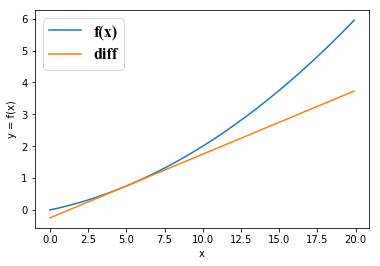

In [16]:
import matplotlib.pylab as plt

x = np.arange(0, 20, 0.1)
y = func(x)
plt.xlabel("x")
plt.ylabel("y = f(x)")
plt.plot(x, y, label='f(x)')
plt.plot(x, numerical_diff(func, 5)*x-0.25, label='diff')
plt.legend(prop={'family' : 'Times New Roman','size'   : 16})
plt.show()

In [16]:
print(numerical_diff(func, 5))

0.1999999999990898


In [17]:
numerical_diff(func, 10)

0.2999999999986347

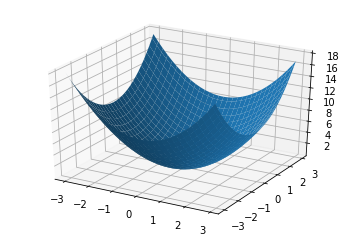

In [18]:
# 偏导数
def func2(x):
    return x[0]**2 + x[1]**2

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')
x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
X, Y = np.meshgrid(x, y)
z =  np.add(np.power(X, 2), np.power(Y, 2))
surf = ax.plot_surface(X, Y, z) 
plt.show()

### 梯度
由全部变量的偏导数汇总而成的向量称为梯度（gradient）。

In [19]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x) # 生成形状与x相同，所有元素都为0的数组
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val +h
        fxh1 = f(x)
        x[idx] = tmp_val-h
        fxh2 = f(x)
        grad[idx]=(fxh1-fxh2)/(2*h)
        x[idx]=tmp_val
    return grad

In [20]:
numerical_gradient(func2, np.array([3.0, 4.0]))

array([6., 8.])

$f(x_0,x_1)=x_0^2+x_1^2$的梯度：
![](../img/梯度.png)

### 梯度法
一般而言，损失函数很复杂，参数空间庞大，我们不知道它在何处能取得最小值。而通过巧妙地使用梯度来寻找函数最小值（或者尽可能小的值）的方法就是梯度法。

梯度表示的是各点处的函数值减小最多的方向，而不是指向函数最小值的方向。

函数的极小值、最小值以及被称为鞍点（saddle point）的地方，梯度为0。极小值是局部最小值，也就是限定在某个范围内的最小值。

在梯度法中，函数的取值从当前位置沿着梯度方向前进一定距离，然后在新的地方重新求梯度，再沿着新梯度方向前进，如此反复，不断地沿梯度方向前进。像这样，通过不断地沿梯度方向前进，逐渐减小函数值的过程就是梯度法（gradient method）。

$ x_0 = x_0 - \eta\frac{\partial f}{\partial x_0}$
$ x_1 = x_1 - \eta\frac{\partial f}{\partial x_1}$
$\eta$表示更新量，在神经网络中，称为学习率（learning rate）。学习率决定在一次学习中，应该学习多少，以及在多大程度上更新参数。

In [21]:
'''
lr: learning rate
step_num: repeat times
'''
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr*grad
    return x

In [30]:
init_x = np.array([-3.0, 4.0])

In [32]:
print(gradient_descent(func2, init_x = init_x, lr = 0.1, step_num=100))

[-4.88888634e-10  6.51851512e-10]


In [36]:
# 学习率过大，发散成一个很大的值
init_x = np.array([-3.0, 4.0])
print(gradient_descent(func2, init_x = init_x, lr = 10.0, step_num=100))

# 学习率过小，没怎么更新就结束了
init_x = np.array([-3.0, 4.0])
print(gradient_descent(func2, init_x = init_x, lr = 1e-10, step_num=100))

[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


### 超参数
像学习率这样的参数称为超参数。这是一种和神经网络的参数（权重和偏置）性质不同的参数。相对于神经网络的权重参数是通过训练数据和学习算法自动获得的，学习率这样的超参数则是人工设定的。一般来说，超参数需要尝试多个值，以便找到一种可以使学习顺利进行的设定。

只有一个形状为2×3的权重W的神经网络，损失函数为L，梯度为：
![](../img/DL梯度.PNG)
